# Home Work Assignment 1

**This is a group assignment.**

**Your home work assignment group will be same as your Kaggle group.**

**Team lead must submit answers to TA Arabinda Panda by mail.**

**There will be only one submission for a group**

**Use your group name for naming the file, e.g, HW_1_GRP12**

#Submission deadline: 5th September 2023, 23:59 hours

---



In [3]:
import tensorflow as tf
import numpy as np
import time

Question1: Load data CIFAR10 from tensorflow keras

In [4]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


Question2: Split data into 80% train and 20% test

In [5]:
print(trainX.shape, testX.shape)
print("Already split in 80-20 shape")

print(np.unique(trainY))

(50000, 32, 32, 3) (10000, 32, 32, 3)
Already split in 80-20 shape
[0 1 2 3 4 5 6 7 8 9]


Question3: Use one-hot encoding to convert target variable Y into categorical vectors. i.e., apply one-hot encoding to trainY and testY.
Please refer to DNN Lab 2 jupyter notebook for similar task.  

In [6]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

print(trainY[0])
print(testY[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


Question4: Plot (using matplotlib) two data points from trainX

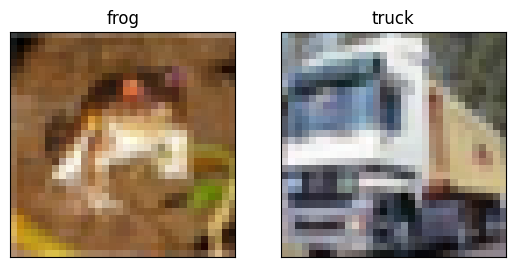

In [7]:
CLASS_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,2)
for (i, ax) in enumerate(axes.flatten()):
  ax.imshow(trainX[i])
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(CLASS_NAMES[trainY[i].argmax()])

Question5: Build a deep learning model with atleast 4 hidden layers and more than 100 hidden neurons to classify 10 classes of CIFAR10

Call this built model as **firstModel**

In [16]:
class Model:

  def setModel(self):
    self.model.add(tf.keras.layers.Reshape((3072,),input_shape = (32,32,3)))
    self.model.add(tf.keras.layers.Dense(1500,activation="sigmoid"))
    self.model.add(tf.keras.layers.Dense(1100,activation="relu"))
    self.model.add(tf.keras.layers.Dropout(rate=0.4))
    self.model.add(tf.keras.layers.Dense(600,activation="sigmoid"))
    self.model.add(tf.keras.layers.Dropout(rate=0.5))
    self.model.add(tf.keras.layers.Dense(300,activation="relu"))
    self.model.add(tf.keras.layers.Dense(750,activation="sigmoid"))
    self.model.add(tf.keras.layers.Dropout(rate=0.4))
    self.model.add(tf.keras.layers.Dense(50,activation="relu"))
    self.model.add(tf.keras.layers.Dense(20,activation="sigmoid"))
    self.model.add(tf.keras.layers.Dense(10,activation="softmax"))

  def modelSummary(self):
    self.model.summary()

  def setParams(self):
    sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.09)
    self.model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy",metrics=["accuracy"])

  def __init__(self):
    self.model = tf.keras.models.Sequential()
    self.setModel()

  def fit(self,trainX,trainY,validation_data,epochs,batch_size):
    return self.model.fit(trainX,trainY,validation_data=(testX, testY),epochs=epochs,batch_size=batch_size)

firstModel = Model()
firstModel.modelSummary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_7 (Reshape)         (None, 3072)              0         
                                                                 
 dense_48 (Dense)            (None, 1500)              4609500   
                                                                 
 dense_49 (Dense)            (None, 1100)              1651100   
                                                                 
 dropout_18 (Dropout)        (None, 1100)              0         
                                                                 
 dense_50 (Dense)            (None, 600)               660600    
                                                                 
 dropout_19 (Dropout)        (None, 600)               0         
                                                                 
 dense_51 (Dense)            (None, 300)              

In [19]:
params = [
    {
        "batchSize" : 10,
        "epochs" : 10,
    },
    {
        "batchSize" : 10,
        "epochs" : 100,
    },
    {
        "batchSize" : 500,
        "epochs" : 100,
    },
     {
        "batchSize" : 500,
        "epochs" : 1000,
    },
     {
        "batchSize" : trainX.shape[0]//2,
        "epochs" : 10,
    },
     {
        "batchSize" : trainX.shape[0]//2,
        "epochs" : 100,
    },
     {
        "batchSize" : trainX.shape[0]//2,
        "epochs" : 500,
    },{
        "batchSize" : trainX.shape[0],
        "epochs" : 10,
    },
     {
        "batchSize" : trainX.shape[0],
        "epochs" : 100,
    },
     {
        "batchSize" : trainX.shape[0],
        "epochs" : 500,
    }
]

print(params)

columns = ["simulationNo","batchSize","epochs","trainingTime(sec)","trainAccuracy(%)","testAccuracy(%)"]

[{'batchSize': 10, 'epochs': 10}, {'batchSize': 10, 'epochs': 100}, {'batchSize': 500, 'epochs': 100}, {'batchSize': 500, 'epochs': 1000}, {'batchSize': 25000, 'epochs': 10}, {'batchSize': 25000, 'epochs': 100}, {'batchSize': 25000, 'epochs': 500}, {'batchSize': 50000, 'epochs': 10}, {'batchSize': 50000, 'epochs': 100}, {'batchSize': 50000, 'epochs': 500}]


Question6: Present model accuracy with different batches sizes & epochs. Present results as follows:
$
 \begin{pmatrix}
  simulationNo & batchSize & epochs & trainingTime & trainAccuracy & testAccuracy \\
  1 & 10 & 10 &   &  &  \\
  2 & 10 & 100 &   &  & \\
  3 & 500 & 100 &   &  \\
  4 & 500 & 1000 &   &  \\
  5 & \frac{trainData size}{2} & 10 &   &  \\
  6 & \frac{trainData size}{2} & 100 &   & \\
  7 & \frac{trainData size}{2} & 500 &   & \\
  8 & trainData size & 10 &   &  \\
  9 & trainData size & 100 &   &  \\
  10 & trainData size & 500 &   &   
 \end{pmatrix}$

In [18]:
z = []

models = []
for x in params:
  a = firstModel
  models.append(a)

for i,x in enumerate(params):
  firstModel = Model()
  firstModel.setParams()
  print(x)
  start= time.time()
  y = firstModel.fit(trainX,trainY,validation_data=(testX, testY),epochs=x["epochs"],batch_size=x["batchSize"])
  z.append([y, time.time()-start])

{'batchSize': 10, 'epochs': 10}
Epoch 1/10
5000/5000 [==============================] - 27s 5ms/step - loss: 2.3073 - accuracy: 0.1004 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/10
5000/5000 [==============================] - 29s 6ms/step - loss: 2.3003 - accuracy: 0.1077 - val_loss: 2.3037 - val_accuracy: 0.1025
Epoch 3/10
5000/5000 [==============================] - 29s 6ms/step - loss: 2.2977 - accuracy: 0.1101 - val_loss: 2.2866 - val_accuracy: 0.1000
Epoch 4/10
5000/5000 [==============================] - 25s 5ms/step - loss: 2.2973 - accuracy: 0.1106 - val_loss: 2.2889 - val_accuracy: 0.1578
Epoch 5/10
5000/5000 [==============================] - 25s 5ms/step - loss: 2.3000 - accuracy: 0.1078 - val_loss: 2.2956 - val_accuracy: 0.1166
Epoch 6/10
5000/5000 [==============================] - 25s 5ms/step - loss: 2.3012 - accuracy: 0.1066 - val_loss: 2.3140 - val_accuracy: 0.0999
Epoch 7/10
5000/5000 [==============================] - 25s 5ms/step - loss: 2.3026 - accuracy: 0.

In [20]:
import pandas as pd
values = []
for i,x in enumerate(params):
  values.append([i+1,x['batchSize'],x['epochs'],round(z[i][1],2),round(z[i][0].history['accuracy'][-1]*100,2),round(z[i][0].history['val_accuracy'][-1]*100,2)])
solution = pd.DataFrame(values,columns=columns)
solution.head(10)

,simulationNo,batchSize,epochs,trainingTime(sec),trainAccuracy(%),testAccuracy(%)
0,1,10,10,263.65,10.89,10.30
1,2,10,100,2543.43,10.03,10.12
2,3,500,100,92.25,18.00,20.35
3,4,500,1000,983.41,19.91,18.09
4,5,25000,10,11.76,9.97,10.00
5,6,25000,100,83.42,10.12,10.00
6,7,25000,500,324.46,18.08,18.54
7,8,50000,10,12.15,10.06,10.00
8,9,50000,100,84.26,10.21,10.00
9,10,50000,500,383.42,12.45,17.07


In [31]:
anotherModel = Model()
anotherModel.setParams()
anotherModel.fit(trainX,trainY,validation_data=(testX,testY),epochs=650,batch_size=2000)

Epoch 1/650
25/25 [==============================] - 2s 41ms/step - loss: 2.3264 - accuracy: 0.0997 - val_loss: 2.3041 - val_accuracy: 0.1000
Epoch 2/650
25/25 [==============================] - 1s 27ms/step - loss: 2.3073 - accuracy: 0.1005 - val_loss: 2.3027 - val_accuracy: 0.0914
Epoch 3/650
25/25 [==============================] - 1s 26ms/step - loss: 2.3067 - accuracy: 0.0991 - val_loss: 2.3028 - val_accuracy: 0.0969
Epoch 4/650
25/25 [==============================] - 1s 26ms/step - loss: 2.3064 - accuracy: 0.1004 - val_loss: 2.3025 - val_accuracy: 0.1000
Epoch 5/650
25/25 [==============================] - 1s 26ms/step - loss: 2.3053 - accuracy: 0.1005 - val_loss: 2.3024 - val_accuracy: 0.1000
Epoch 6/650
25/25 [==============================] - 1s 27ms/step - loss: 2.3050 - accuracy: 0.1014 - val_loss: 2.3023 - val_accuracy: 0.1000
Epoch 7/650
25/25 [==============================] - 1s 27ms/step - loss: 2.3051 - accuracy: 0.1024 - val_loss: 2.3022 - val_accuracy: 0.0989
Epoch 

Question7: Plot testY[0] and testY[1]

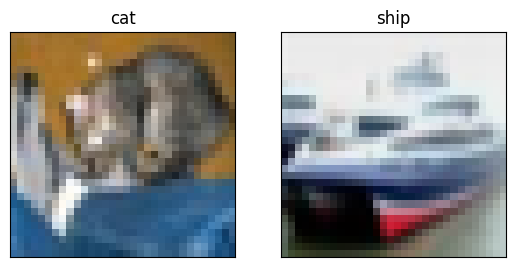

In [32]:
(fig,axes) = plt.subplots(1,2)
for i,ax in enumerate(axes.flatten()):
  ax.imshow(testX[i])
  ax.set_title(CLASS_NAMES[testY[i].argmax()])
  ax.set_xticks([])
  ax.set_yticks([])

Question8: Predict testY[0] and testY[1] class using **firstModel**

In [33]:
predictTest = firstModel.model.predict(testX)

313/313 [==============================] - 1s 2ms/step


In [34]:
print(f'The prediction for test dataset is {predictTest[0].argmax(), predictTest[1].argmax()}')
print(f'which belong to class {CLASS_NAMES[predictTest[0].argmax()], CLASS_NAMES[predictTest[1].argmax()]}')

The prediction for test dataset is (3, 8)
which belong to class ('cat', 'ship')


Question9: Compare prediction results with actual test images (refer to Question 7 for actual test images). Write down your observations.

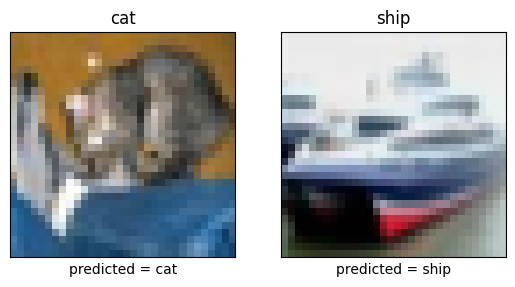

In [35]:
(fig,axes) = plt.subplots(1,2)
for i,ax in enumerate(axes.flatten()):
  ax.imshow(testX[i])
  ax.set_title(CLASS_NAMES[testY[i].argmax()])
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_xlabel(f'predicted = {CLASS_NAMES[predictTest[i].argmax()]}')

The Model gives accuracy of 28.19% which can be improved if we use different techniques like using CNN instead of DNN which works much better on image data also using more layers with dropout layers in between. we can also try image augmentation to reduce variance from the model we can also change some hyper parameter to increase the accuracy of our model

In [50]:
class CNNModel:
  def __init__(self):
    self.model = self.getModel()

  def getModel(self):
    md = tf.keras.models.Sequential()
    md.add(tf.keras.layers.Conv2D(64,(5,5), padding="same", activation="relu",input_shape=(32,32,3)))
    md.add(tf.keras.layers.Conv2D(128,(3,3), padding="valid", activation="relu"))
    md.add(tf.keras.layers.Conv2D(64,(5,5), padding="same", activation="relu"))
    md.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

    md.add(tf.keras.layers.Conv2D(128,(3,3), padding="same", activation="relu"))
    md.add(tf.keras.layers.Conv2D(128,(3,3), padding="valid", activation="relu"))
    md.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

    md.add(tf.keras.layers.Conv2D(128,(3,3), padding="same", activation="relu"))
    md.add(tf.keras.layers.Conv2D(128,(3,3), padding="valid", activation="relu"))
    md.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

    md.add(tf.keras.layers.Flatten())
    md.add(tf.keras.layers.Dense(128, activation="relu"))
    md.add(tf.keras.layers.Dense(64, activation="relu"))
    md.add(tf.keras.layers.Dense(10, activation="softmax"))
    return md
  def getSummary(self):
    self.model.summary()

  def fit(self,trainX,trainY,validation_data,epochs,batch_size):
    return self.model.fit(trainX,trainY,validation_data=(testX, testY),epochs=epochs,batch_size=batch_size)

  def setParams(self):
    self.model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])


firstCNNModel = CNNModel()

firstCNNModel.getSummary()
firstCNNModel.setParams()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 32, 32, 64)        4864      
                                                                 
 conv2d_58 (Conv2D)          (None, 30, 30, 128)       73856     
                                                                 
 conv2d_59 (Conv2D)          (None, 30, 30, 64)        204864    
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_60 (Conv2D)          (None, 15, 15, 128)       73856     
                                                                 
 conv2d_61 (Conv2D)          (None, 13, 13, 128)       147584    
                                                     

In [51]:
firstCNNModel.fit(trainX,trainY,validation_data=(testX,testY),epochs=40,batch_size=2000)

Epoch 1/40
25/25 [==============================] - 20s 637ms/step - loss: 3.1094 - accuracy: 0.1217 - val_loss: 2.2686 - val_accuracy: 0.1514
Epoch 2/40
25/25 [==============================] - 16s 637ms/step - loss: 2.0916 - accuracy: 0.2266 - val_loss: 1.9607 - val_accuracy: 0.3016
Epoch 3/40
25/25 [==============================] - 17s 662ms/step - loss: 1.8512 - accuracy: 0.3239 - val_loss: 1.6811 - val_accuracy: 0.3889
Epoch 4/40
25/25 [==============================] - 16s 637ms/step - loss: 1.6457 - accuracy: 0.4001 - val_loss: 1.5854 - val_accuracy: 0.4191
Epoch 5/40
25/25 [==============================] - 16s 633ms/step - loss: 1.5078 - accuracy: 0.4545 - val_loss: 1.6515 - val_accuracy: 0.4322
Epoch 6/40
25/25 [==============================] - 16s 650ms/step - loss: 1.4369 - accuracy: 0.4871 - val_loss: 1.3841 - val_accuracy: 0.4951
Epoch 7/40
25/25 [==============================] - 16s 638ms/step - loss: 1.3143 - accuracy: 0.5293 - val_loss: 1.3041 - val_accuracy: 0.5293

Using CNN we get 99% accuracy on training set and just 71% accuracy on test set suggesting model overfitting the data. Thus some techniques could be implemented to reduce overfitting like adding dropout rate, image augmentation etc.

In [52]:
from keras.preprocessing.image import ImageDataGenerator

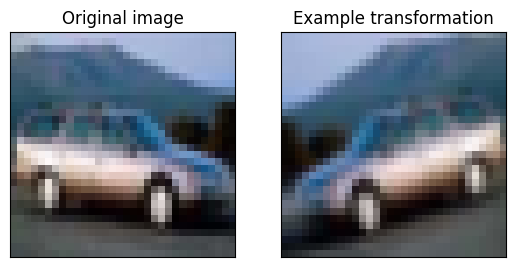

In [80]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    channel_shift_range=0.05,
    rotation_range=10,
    validation_split=0.15
)

img = trainX[4]

fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[0].set_title("Original image")
ax[1].imshow(datagen.apply_transform(img,{'theta':-10,'channel_shift_intensity':0.05,'flip_horizontal':True}).astype('uint8'))
ax[1].set_title("Example transformation")

for i in range(2):
  ax[i].set_xticks([])
  ax[i].set_yticks([])
plt.show()

In [81]:
training_flow = datagen.flow(trainX, trainY, batch_size=32)

In [89]:
class CNNDropoutModel:
  def __init__(self):
    self.model = self.getModel()

  def getModel(self):
    md = tf.keras.models.Sequential()
    md.add(tf.keras.layers.Conv2D(64,(5,5), padding="same", activation="relu",input_shape=(32,32,3)))
    md.add(tf.keras.layers.Conv2D(128,(3,3), padding="valid", activation="relu"))
    md.add(tf.keras.layers.Conv2D(64,(5,5), padding="same", activation="relu"))
    md.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
    md.add(tf.keras.layers.Dropout(rate=0.2))

    md.add(tf.keras.layers.Conv2D(128,(3,3), padding="same", activation="relu"))
    md.add(tf.keras.layers.Conv2D(128,(3,3), padding="valid", activation="relu"))
    md.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
    md.add(tf.keras.layers.Dropout(rate=0.2))

    md.add(tf.keras.layers.Conv2D(128,(3,3), padding="same", activation="relu"))
    md.add(tf.keras.layers.Conv2D(128,(3,3), padding="valid", activation="relu"))
    md.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

    md.add(tf.keras.layers.Flatten())
    md.add(tf.keras.layers.Dense(128, activation="relu"))

    md.add(tf.keras.layers.Dense(64, activation="relu"))
    md.add(tf.keras.layers.Dense(10, activation="softmax"))
    return md
  def getSummary(self):
    self.model.summary()

  def fit(self,tflow,validation_data,epochs,batch_size):
    return self.model.fit(tflow,validation_data=(testX, testY),epochs=epochs,batch_size=batch_size)

  def setParams(self):
    self.model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])


firstCNNDropoutModel = CNNDropoutModel()

firstCNNDropoutModel.getSummary()
firstCNNDropoutModel.setParams()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_137 (Conv2D)         (None, 32, 32, 64)        4864      
                                                                 
 conv2d_138 (Conv2D)         (None, 30, 30, 128)       73856     
                                                                 
 conv2d_139 (Conv2D)         (None, 30, 30, 64)        204864    
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 dropout_94 (Dropout)        (None, 15, 15, 64)        0         
                                                                 
 conv2d_140 (Conv2D)         (None, 15, 15, 128)       73856     
                                                     

In [ ]:
firstCNNDropoutModel.fit(training_flow,validation_data=(testX,testY),epochs=70,batch_size=2000)

Epoch 1/70
1563/1563 [==============================] - 51s 30ms/step - loss: 1.9632 - accuracy: 0.2691 - val_loss: 1.8332 - val_accuracy: 0.3280
Epoch 2/70
1563/1563 [==============================] - 47s 30ms/step - loss: 1.6603 - accuracy: 0.3911 - val_loss: 1.6657 - val_accuracy: 0.4092
Epoch 3/70
1563/1563 [==============================] - 46s 29ms/step - loss: 1.5259 - accuracy: 0.4453 - val_loss: 1.4325 - val_accuracy: 0.4882
Epoch 4/70
1563/1563 [==============================] - 46s 30ms/step - loss: 1.4550 - accuracy: 0.4775 - val_loss: 1.3032 - val_accuracy: 0.5356
Epoch 5/70
1563/1563 [==============================] - 47s 30ms/step - loss: 1.3579 - accuracy: 0.5159 - val_loss: 1.2561 - val_accuracy: 0.5543
Epoch 6/70
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2901 - accuracy: 0.5429 - val_loss: 1.2132 - val_accuracy: 0.5730
Epoch 7/70
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2280 - accuracy: 0.5667 - val_loss: 1.1503 -

In [ ]:
predictTestNew = firstModel.model.predict(testX)
(fig,axes) = plt.subplots(1,2)
for i,ax in enumerate(axes.flatten()):
  ax.imshow(testX[i])
  ax.set_title(CLASS_NAMES[testY[i].argmax()])
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_xlabel(f'predicted = {CLASS_NAMES[predictTest[i].argmax()]}')

Question10: Save your jupyter notebook(with your simulation results) and send to Arabinda Panda by email